In [35]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pathlib
import os
import cv2

print(tf.__version__)

2.3.0


In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image

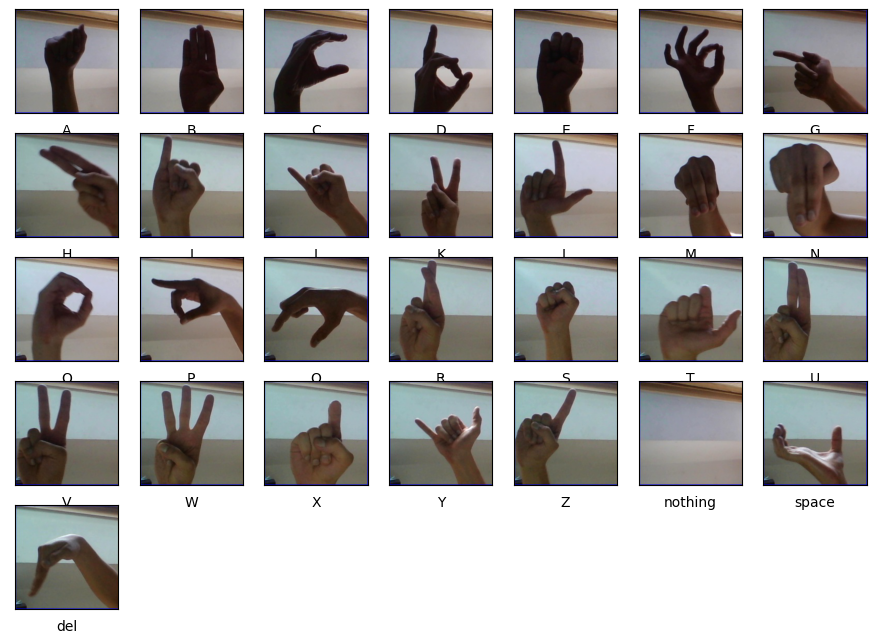

In [37]:
train_dir = '../Downloads/archive/asl_alphabet_train/asl_alphabet_train'
test_dir = '../Downloads/archive/asl_alphabet_test/asl_alphabet_test'

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [10]:
def load_data(train_dir):
    images = []
    labels = []
    size = 64,64
    index = -1
    for folder in os.listdir(train_dir):
        index +=1
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1)

    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = load_data(train_dir)

Loaded 78300 images for training, Train data shape = (78300, 64, 64, 3)
Loaded 8700 images for testing Test data shape = (8700, 64, 64, 3)


In [13]:
train_label=np.zeros(78300)
for i in range(78300):
  train_label[i]=np.where(y_train[i]==1)[0][0]
train_label=train_label.astype(int)

test_label=np.zeros(8700)
for i in range(8700):
  test_label[i]=np.where(y_test[i]==1)[0][0]
test_label=test_label.astype(int)

Model1

In [38]:
model = Sequential()

model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = [3,3]))

model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = [3,3]))

model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = [3,3]))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(29, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 7, 128)        

In [40]:
history = model.fit(x_train, train_label, batch_size = 32, epochs = 100, validation_split = 0.1, callbacks = EarlyStopping())

Epoch 1/100
2203/2203 [==============================] - 929s 422ms/step - loss: 0.7598 - accuracy: 0.7668 - val_loss: 0.1080 - val_accuracy: 0.9650
Epoch 2/100
2203/2203 [==============================] - 969s 440ms/step - loss: 0.0543 - accuracy: 0.9820 - val_loss: 0.0410 - val_accuracy: 0.9849
Epoch 3/100
2203/2203 [==============================] - 965s 438ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.0660 - val_accuracy: 0.9779


In [41]:
test_loss, test_acc = model.evaluate(x_test, test_label)

print('\nTest accuracy:', test_acc)

272/272 [==============================] - 41s 151ms/step - loss: 0.0623 - accuracy: 0.9789

Test accuracy: 0.9788506031036377


Model2 - regularizer 적용

In [42]:
model2 = Sequential()

model2.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model2.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = [3,3]))

model2.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model2.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = [3,3]))

model2.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model2.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size = [3,3]))

model2.add(Flatten())
model2.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model2.add(Dense(29, activation = 'softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 7, 7, 128)        

In [44]:
history2 = model2.fit(x_train, train_label, batch_size = 32, epochs = 100, validation_split = 0.1, callbacks = EarlyStopping())

Epoch 1/100
2203/2203 [==============================] - 964s 438ms/step - loss: 0.7330 - accuracy: 0.8040 - val_loss: 0.2300 - val_accuracy: 0.9542
Epoch 2/100
2203/2203 [==============================] - 977s 443ms/step - loss: 0.1645 - accuracy: 0.9742 - val_loss: 0.1310 - val_accuracy: 0.9843
Epoch 3/100
2203/2203 [==============================] - 688s 313ms/step - loss: 0.1199 - accuracy: 0.9846 - val_loss: 0.1275 - val_accuracy: 0.9837
Epoch 4/100
2203/2203 [==============================] - 356s 162ms/step - loss: 0.0954 - accuracy: 0.9891 - val_loss: 0.1116 - val_accuracy: 0.9822
Epoch 5/100
2203/2203 [==============================] - 349s 158ms/step - loss: 0.0829 - accuracy: 0.9910 - val_loss: 0.0585 - val_accuracy: 0.9944
Epoch 6/100
2203/2203 [==============================] - 340s 154ms/step - loss: 0.0822 - accuracy: 0.9901 - val_loss: 0.0652 - val_accuracy: 0.9963


In [45]:
test_loss, test_acc = model2.evaluate(x_test, test_label)

print('\nTest accuracy:', test_acc)

272/272 [==============================] - 13s 50ms/step - loss: 0.0661 - accuracy: 0.9970

Test accuracy: 0.9970114827156067


model3 - BatchNormalization 적용

In [50]:
model3 = Sequential()

model3.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model3.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = [3,3]))

model3.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model3.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = [3,3]))

model3.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model3.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size = [3,3]))

model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model3.add(Dense(29, activation = 'softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 7, 7, 128)        

In [53]:
history3 = model3.fit(x_train, train_label, batch_size = 32, epochs = 100, validation_split = 0.1, callbacks = EarlyStopping())

Epoch 1/100
2203/2203 [==============================] - 352s 160ms/step - loss: 0.5513 - accuracy: 0.8968 - val_loss: 0.2942 - val_accuracy: 0.9386
Epoch 2/100
2203/2203 [==============================] - 347s 157ms/step - loss: 0.1682 - accuracy: 0.9813 - val_loss: 0.1501 - val_accuracy: 0.9729
Epoch 3/100
2203/2203 [==============================] - 347s 157ms/step - loss: 0.1443 - accuracy: 0.9851 - val_loss: 0.1733 - val_accuracy: 0.9727


In [55]:
test_loss, test_acc = model3.evaluate(x_test, test_label)

print('\nTest accuracy:', test_acc)

272/272 [==============================] - 17s 63ms/step - loss: 0.1747 - accuracy: 0.97480s - loss: 0.1

Test accuracy: 0.9748275876045227


model4 - Dropout 적용

In [56]:
model4 = Sequential()

model4.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model4.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size = [3,3]))

model4.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model4.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size = [3,3]))

model4.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model4.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model4.add(MaxPooling2D(pool_size = [3,3]))

model4.add(BatchNormalization())

model4.add(Flatten())
model4.add(Dropout(0.5))
model4.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model4.add(Dense(29, activation = 'softmax'))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 128)       

In [58]:
history4 = model4.fit(x_train, train_label, batch_size = 32, epochs = 100, validation_split = 0.1, callbacks = EarlyStopping())

Epoch 1/100
2203/2203 [==============================] - 345s 156ms/step - loss: 0.7943 - accuracy: 0.8309 - val_loss: 0.3012 - val_accuracy: 0.9593
Epoch 2/100
2203/2203 [==============================] - 343s 156ms/step - loss: 0.2693 - accuracy: 0.9649 - val_loss: 0.2538 - val_accuracy: 0.9723
Epoch 3/100
2203/2203 [==============================] - 343s 156ms/step - loss: 0.2132 - accuracy: 0.9771 - val_loss: 0.1722 - val_accuracy: 0.9903
Epoch 4/100
2203/2203 [==============================] - 347s 158ms/step - loss: 0.1958 - accuracy: 0.9815 - val_loss: 0.1712 - val_accuracy: 0.9870
Epoch 5/100
2203/2203 [==============================] - 339s 154ms/step - loss: 0.1722 - accuracy: 0.9850 - val_loss: 0.1606 - val_accuracy: 0.9838
Epoch 6/100
2203/2203 [==============================] - 343s 156ms/step - loss: 0.1577 - accuracy: 0.9876 - val_loss: 0.1082 - val_accuracy: 0.9950
Epoch 7/100
2203/2203 [==============================] - 345s 157ms/step - loss: 0.1363 - accuracy: 0.9889

In [59]:
test_loss, test_acc = model4.evaluate(x_test, test_label)

print('\nTest accuracy:', test_acc)

272/272 [==============================] - 13s 49ms/step - loss: 0.1389 - accuracy: 0.9936

Test accuracy: 0.9935632348060608


model5 - model4에서 batch size 64로 증가

In [60]:
model5 = Sequential()

model5.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model5.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model5.add(MaxPooling2D(pool_size = [3,3]))

model5.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model5.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model5.add(MaxPooling2D(pool_size = [3,3]))

model5.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model5.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model5.add(MaxPooling2D(pool_size = [3,3]))

model5.add(BatchNormalization())

model5.add(Flatten())
model5.add(Dropout(0.5))
model5.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model5.add(Dense(29, activation = 'softmax'))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
history5 = model5.fit(x_train, train_label, batch_size = 64, epochs = 100, validation_split = 0.1, callbacks = EarlyStopping())

Epoch 1/100
1102/1102 [==============================] - 293s 266ms/step - loss: 0.8431 - accuracy: 0.8330 - val_loss: 0.2559 - val_accuracy: 0.9742
Epoch 2/100
1102/1102 [==============================] - 291s 264ms/step - loss: 0.2004 - accuracy: 0.9770 - val_loss: 0.1488 - val_accuracy: 0.9891
Epoch 3/100
1102/1102 [==============================] - 290s 263ms/step - loss: 0.1706 - accuracy: 0.9809 - val_loss: 0.1516 - val_accuracy: 0.9822


In [62]:
test_loss, test_acc = model5.evaluate(x_test, test_label)

print('\nTest accuracy:', test_acc)

272/272 [==============================] - 13s 49ms/step - loss: 0.1447 - accuracy: 0.9845

Test accuracy: 0.9844827651977539


model6 - model4에서 batch size 128로 증가

In [63]:
model6 = Sequential()

model6.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model6.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model6.add(MaxPooling2D(pool_size = [3,3]))

model6.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model6.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model6.add(MaxPooling2D(pool_size = [3,3]))

model6.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model6.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
model6.add(MaxPooling2D(pool_size = [3,3]))

model6.add(BatchNormalization())

model6.add(Flatten())
model6.add(Dropout(0.5))
model6.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
model6.add(Dense(29, activation = 'softmax'))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [64]:
history6 = model6.fit(x_train, train_label, batch_size = 128, epochs = 100, validation_split = 0.1, callbacks = EarlyStopping())

Epoch 1/100
551/551 [==============================] - 265s 481ms/step - loss: 1.0205 - accuracy: 0.7894 - val_loss: 0.3988 - val_accuracy: 0.9527
Epoch 2/100
551/551 [==============================] - 264s 479ms/step - loss: 0.2166 - accuracy: 0.9807 - val_loss: 0.2438 - val_accuracy: 0.9467
Epoch 3/100
551/551 [==============================] - 262s 476ms/step - loss: 0.1173 - accuracy: 0.9886 - val_loss: 0.3520 - val_accuracy: 0.9020


In [65]:
test_loss, test_acc = model6.evaluate(x_test, test_label)

print('\nTest accuracy:', test_acc)

272/272 [==============================] - 13s 50ms/step - loss: 0.3572 - accuracy: 0.9064

Test accuracy: 0.9064368009567261


loss graph

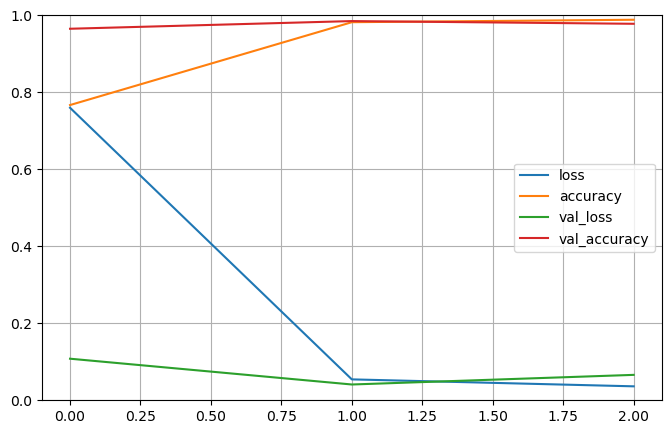

In [67]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

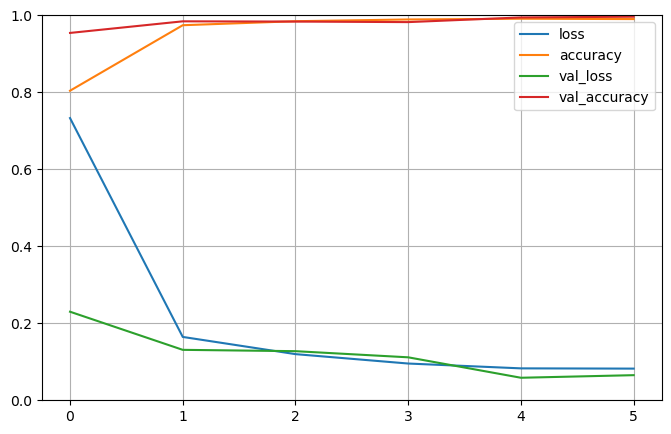

In [68]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

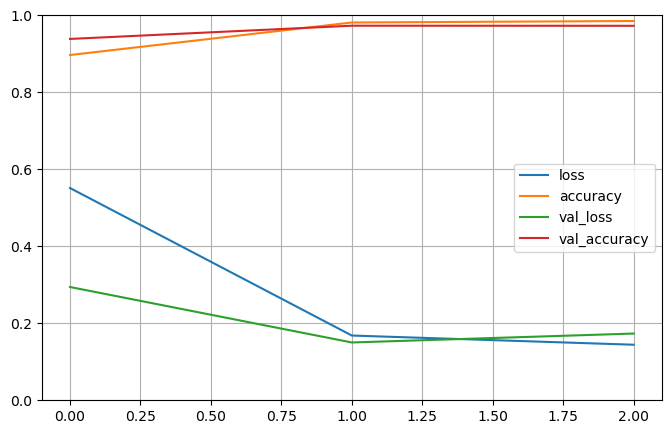

In [69]:
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

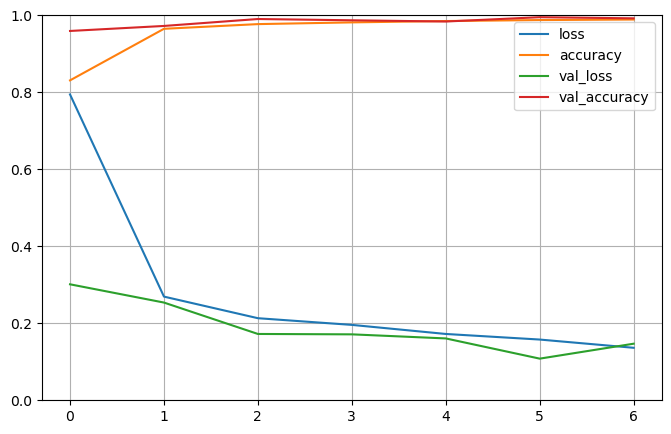

In [70]:
pd.DataFrame(history4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

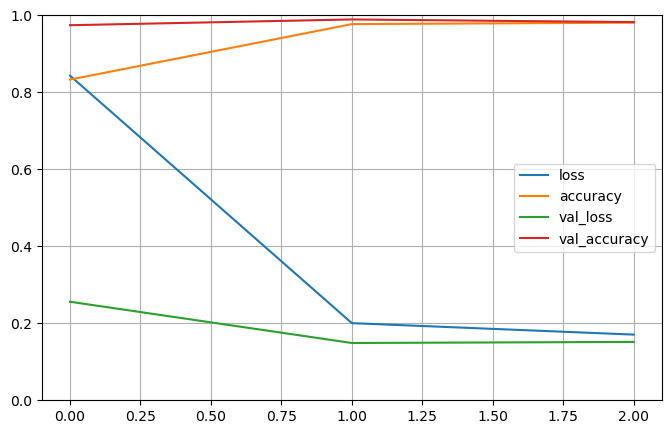

In [71]:
pd.DataFrame(history5.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

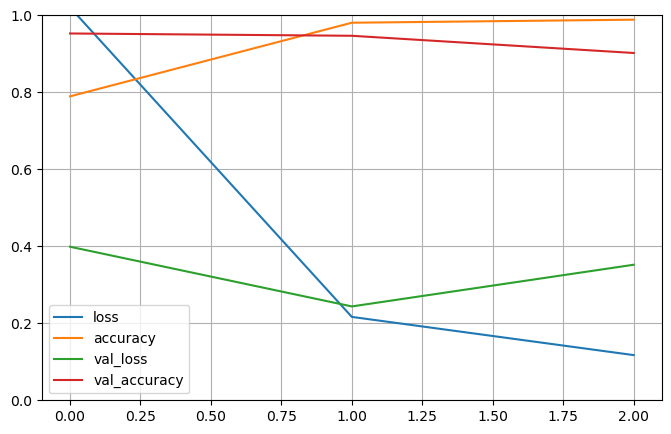

In [72]:
pd.DataFrame(history6.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
probability_model = tf.keras.Sequential([model2,
                                         tf.keras.layers.Softmax()])

In [75]:
predictions = probability_model.predict(x_test)

In [76]:
np.argmax(predictions[0])

6

In [77]:
test_label[0]

6

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(29))
  plt.yticks([])
  thisplot = plt.bar(range(29), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

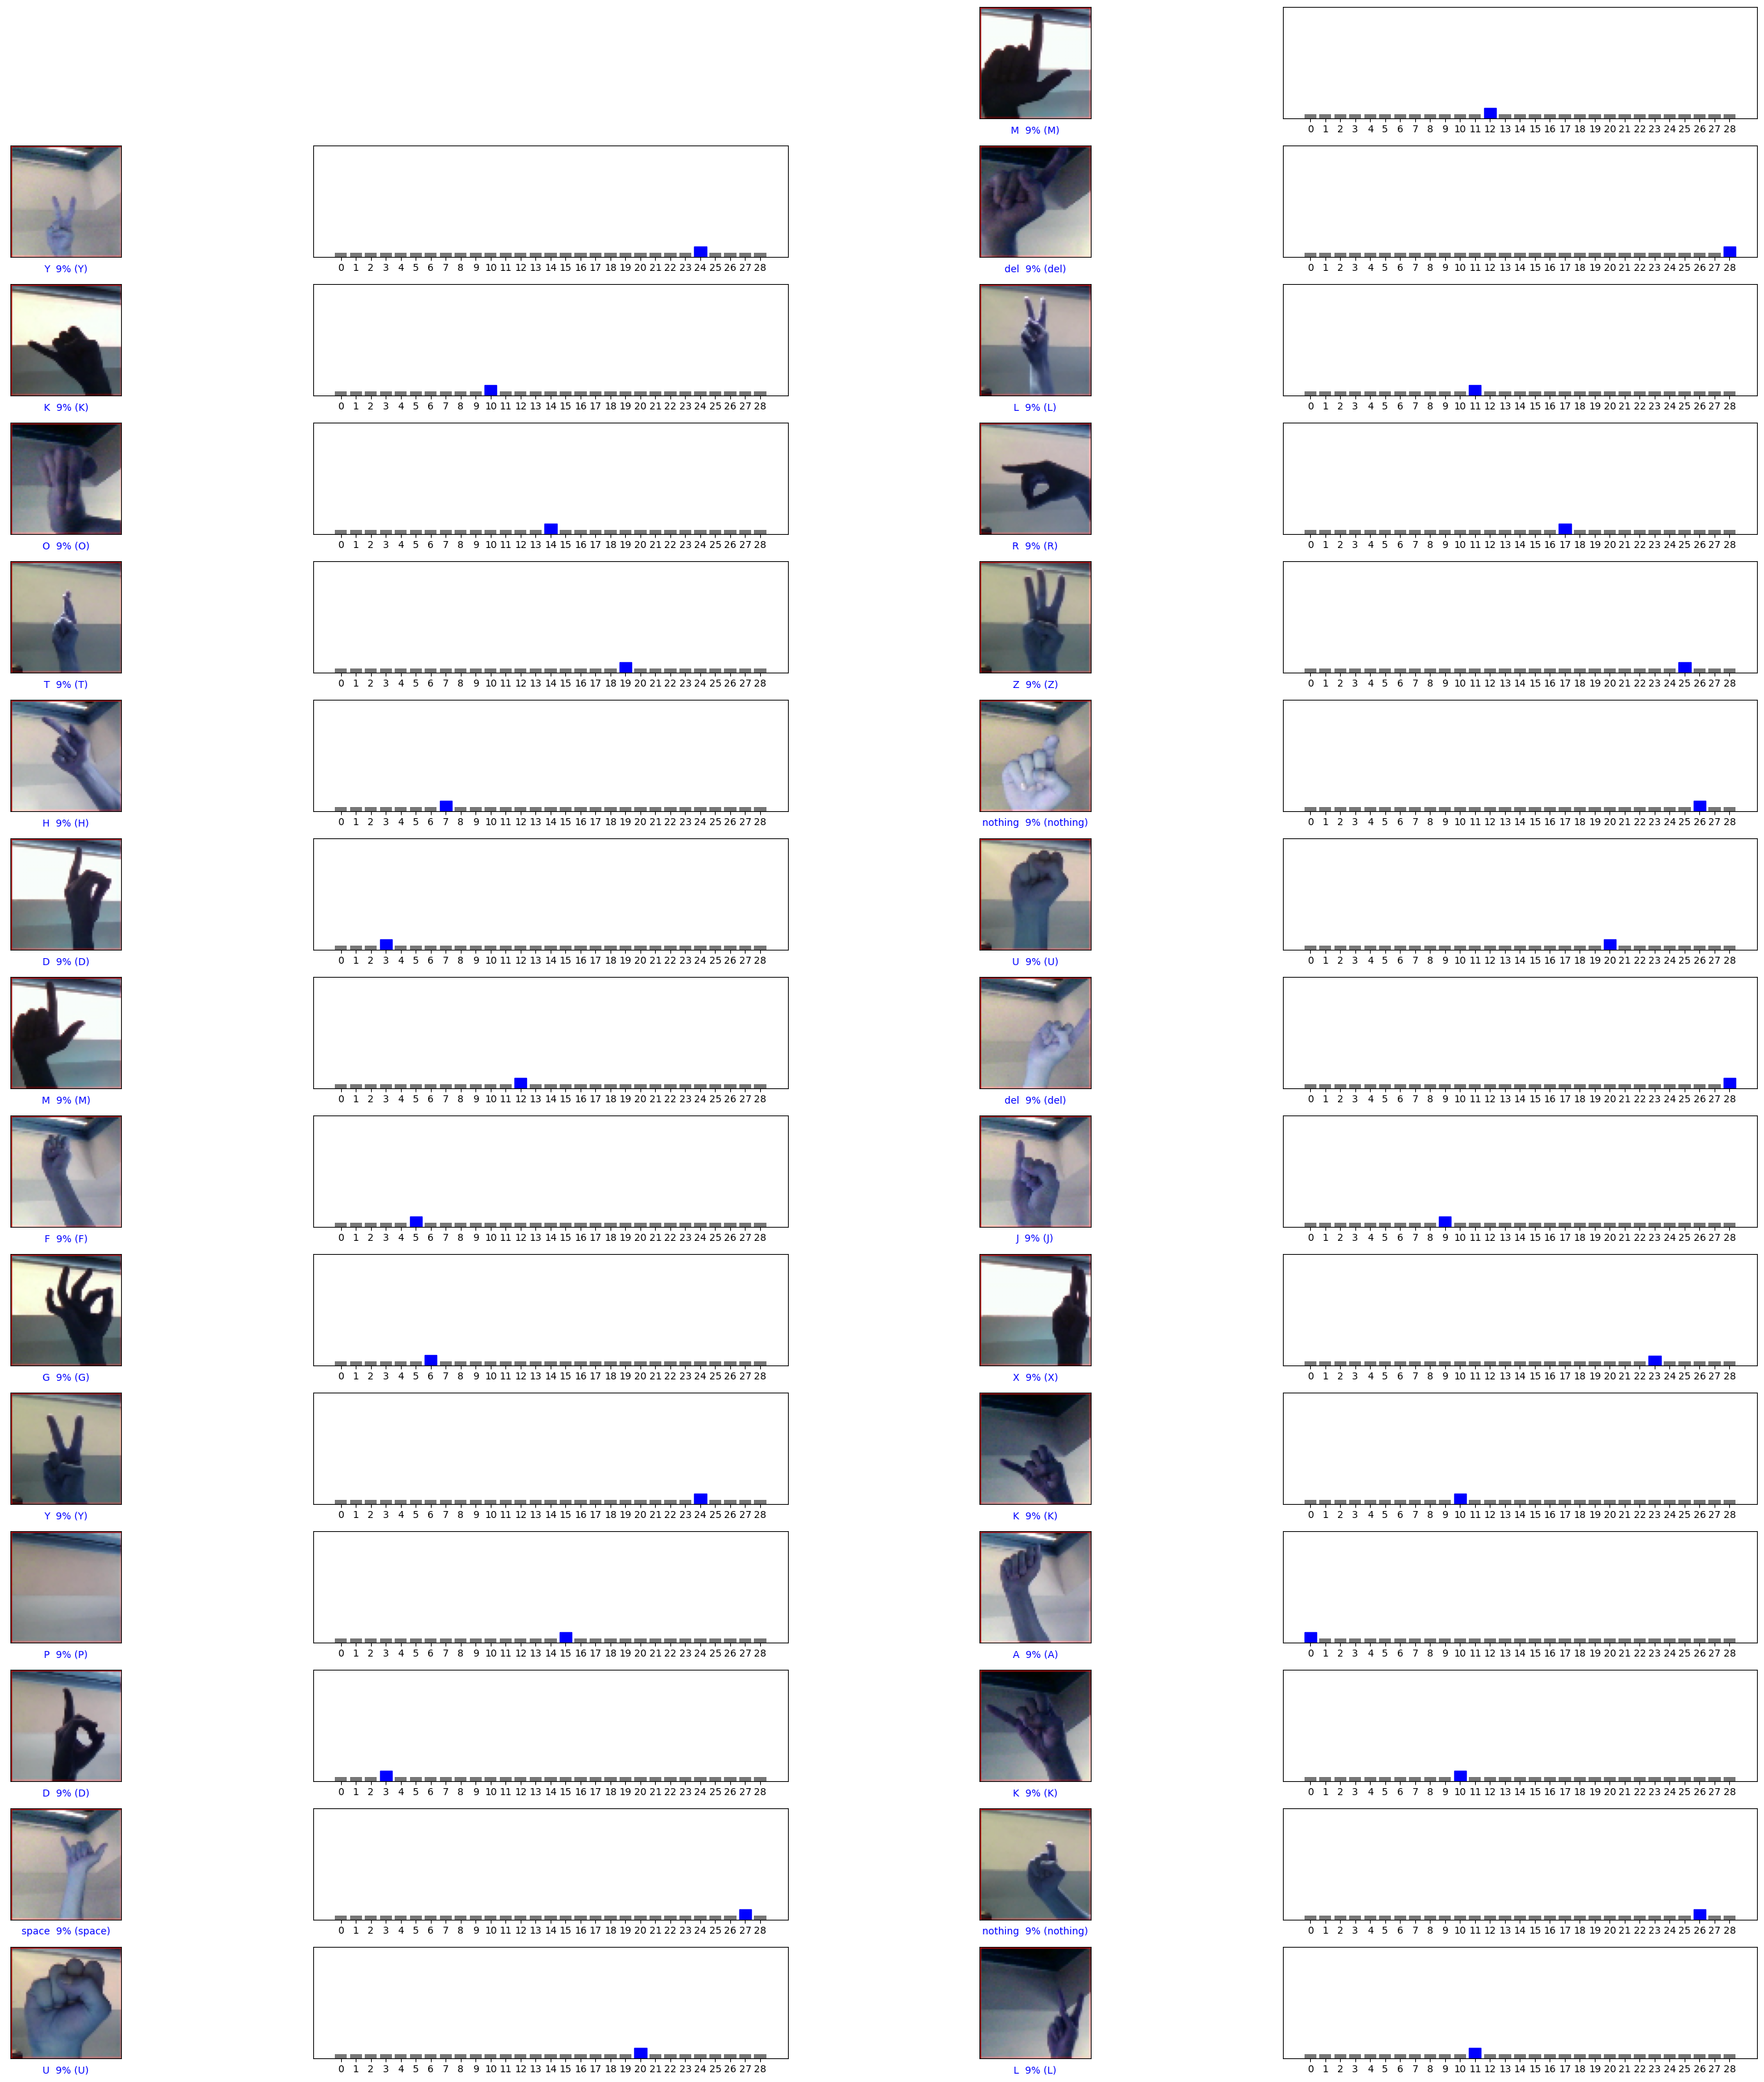

In [78]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 15
num_cols = 2
plt.figure(figsize=(7*2*num_cols, 2*num_rows))
for i in range(1,30):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_label, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()